In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
data = pd.read_csv('requirement.csv', encoding='latin-1')

In [8]:
data.head()

,Requirement
0,"Requirement:\nDegree in Computer Science, Quan..."
1,Requirements:\n\nPassionate about the developm...
2,Requirement:\nDegree or above\nMin. 3 yrs' exp...
3,requirements and collaborating with crucial st...
4,Requirements:\nUniversity degree holder or abo...


In [9]:
# generate cateogical labels for top job requirement
requirement_list = [    'Data analysis',
                        'Data management',
                        'Data governance',
                        'Data modeling',
                        'Data integration',
                        'Data architecture',
                        'Data quality',
                        'Data strategy',
                        'Data warehousing',
                        'Database management',
                        'Data migration',
                        'Data transformation',
                        'Data visualization',
                        'Business intelligence',
                        'Data analytics',
                        'Data mining',
                        'SQL',
                        'Python',
                        'R',
                        'Machine learning',
                        'Statistical analysis',
                        'Data governance',
                        'Data privacy',
                        'Data security',
                        'Data governance frameworks',
                        'Data governance policies',
                        'Data governance tools',
                        'Data stewardship',
                        'Data lineage',
                        'Data documentation'
                    ]

In [10]:
requirement_list

['Data analysis',
 'Data management',
 'Data governance',
 'Data modeling',
 'Data integration',
 'Data architecture',
 'Data quality',
 'Data strategy',
 'Data warehousing',
 'Database management',
 'Data migration',
 'Data transformation',
 'Data visualization',
 'Business intelligence',
 'Data analytics',
 'Data mining',
 'SQL',
 'Python',
 'R',
 'Machine learning',
 'Statistical analysis',
 'Data governance',
 'Data privacy',
 'Data security',
 'Data governance frameworks',
 'Data governance policies',
 'Data governance tools',
 'Data stewardship',
 'Data lineage',
 'Data documentation']

In [18]:
def count_requirement(df, requirement_titles):
    count_by_keyword = []
    count = 0
    for title in requirement_titles: 
        count = len(data[data['Requirement'].str.contains(title, case=False)])
        count_by_keyword.append(count)
    return count_by_keyword

In [19]:
requirement_count = count_requirement(data, requirement_list)

In [20]:
requirement_count

[47,
 40,
 20,
 6,
 8,
 8,
 10,
 4,
 10,
 15,
 3,
 2,
 30,
 41,
 67,
 17,
 150,
 137,
 293,
 44,
 2,
 20,
 4,
 5,
 4,
 0,
 0,
 0,
 0,
 0]

In [28]:
df_requirement = pd.DataFrame({'Requirement_Keywords':requirement_list, 'Count':requirement_count})
df_requirement

,Requirement_Keywords,Count
0,Data analysis,47
1,Data management,40
2,Data governance,20
3,Data modeling,6
4,Data integration,8
5,Data architecture,8
6,Data quality,10
7,Data strategy,4
8,Data warehousing,10
9,Database management,15


In [29]:
def get_requirements(df, requirement_titles):
    requirements = []
    for title in requirement_titles:
        matches = df[df['Requirement'].str.contains(title, case=False)]
        requirements.extend(matches['Requirement'].tolist())
    return requirements

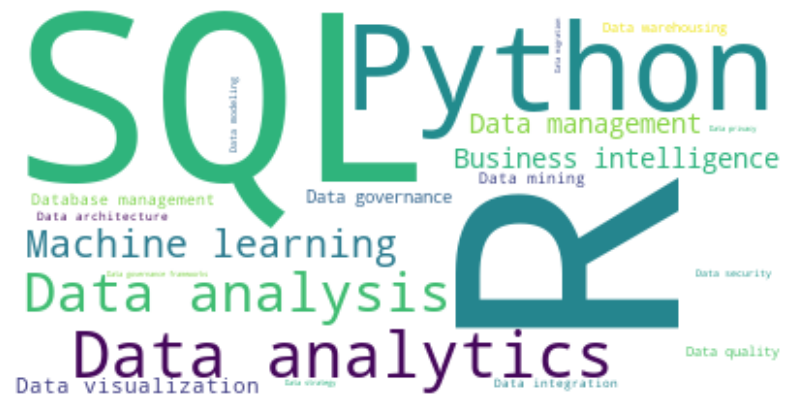

In [35]:


# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(zip(df_requirement['Requirement_Keywords'], df_requirement['Count'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()